<a href="https://colab.research.google.com/github/shylesharepelly/learn_DataScience/blob/main/CNN_handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

In [2]:
#load dataset
mnist=tf.keras.datasets.mnist 

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:

x_test.shape

(10000, 28, 28)

In [6]:
x_train=x_train/255
x_test=x_test/255
     

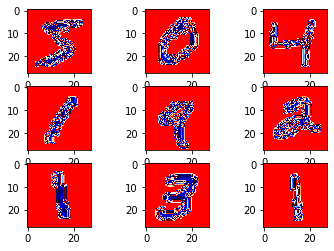

In [7]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i],cmap='flag')

In [8]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [9]:
x_train=x_train.reshape(60000,28,28,1)

In [10]:
#loading model
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3795 - accuracy: 0.0775


[2.3794660568237305, 0.07750000059604645]

In [13]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2559 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1161 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0804 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0598 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0463 - accuracy: 0.9860


In [14]:
y_pred=[]
pred=model.predict(x_test)
for element in pred:
    y_pred.append(np.argmax(element))

313/313 [==============================] - 1s 1ms/step


In [15]:
y_pred=np.array(y_pred)
y_pred
     

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 971,    0,    1,    1,    0,    0,    1,    1,    3,    2],
       [   0, 1123,    4,    1,    0,    1,    2,    1,    3,    0],
       [   5,    0, 1013,    2,    0,    0,    1,    6,    5,    0],
       [   0,    0,    7,  981,    0,   12,    0,    4,    1,    5],
       [   1,    0,    7,    0,  952,    0,    3,    3,    1,   15],
       [   2,    0,    0,    3,    1,  882,    1,    1,    0,    2],
       [   6,    3,    2,    2,    2,    7,  936,    0,    0,    0],
       [   2,    3,    7,    1,    0,    0,    0, 1007,    1,    7],
       [  12,    0,    7,   12,    5,   11,    4,    5,  908,   10],
       [   1,    3,    0,    8,    5,    3,    2,    5,    0,  982]])

In [18]:
actual=y_test
predicted=y_pred
final=pd.DataFrame({'Actual':actual,'predicted':predicted})
final.head(20)

,Actual,predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


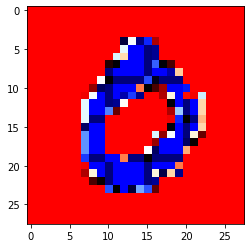

In [19]:
plt.imshow(x_test[3],cmap='flag')

In [20]:
prediction=model.predict(x_test)
print(np.argmax(prediction[3]))
     

313/313 [==============================] - 1s 2ms/step
0


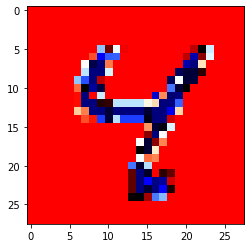

In [21]:
plt.imshow(x_test[6],cmap='flag')
     

In [22]:
prediction=model.predict(x_test)
print(np.argmax(prediction[6]))

313/313 [==============================] - 1s 2ms/step
4


In [ ]:
# our model works perfectly